### Importing Libraries

In [451]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score.f1_score,recall_score,make_scorer

import seaborn as sns
import matplotlib.pyplot as plt

### Reading Data

In [452]:
train = pd.read_csv(r"F:\MSC\CS5617 - Data Science\Project\Dataset\train_indessa.csv")
test = pd.read_csv(r"F:\MSC\CS5617 - Data Science\Project\Dataset\test_indessa.csv")

### Data Preprocessing

In [453]:
print("train shape:",train.shape)
print("test shape:",test.shape)

train shape: (532428, 45)
test shape: (354951, 44)


In [454]:
train.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

In [455]:
test.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

#### Test dataset doesn't  has 'loan_status' column which is what we going to predict.Therefore we cant use above test dataset for testing purpose.Creating a testing dataset using train is the only option.

In [456]:
train.dtypes

member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
batch_enrolled                  object
int_rate                       float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
pymnt_plan                      object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                 

In [457]:
# Data Types

# loan_amnt                     Metric Continuous
# funded_amnt                   Metric Continuous
# funded_amnt_inv               Metric Continuous
# int_rate                      Metric Continuous
# annual_inc                    Metric Continuous
# dti                           Metric Continuous
# delinq_2yrs                   Metric Continuous
# inq_last_6mths                Metric Continuous
# mths_since_last_delinq        Metric Continuous
# mths_since_last_record        Metric Continuous
# open_acc                      Metric Continuous
# pub_rec                       Metric Continuous
# revol_bal                     Metric Continuous
# revol_util                    Metric Continuous
# total_acc                     Metric Continuous
# total_rec_int                 Metric Continuous
# total_rec_late_fee            Metric Continuous
# recoveries                    Metric Continuous
# collection_recovery_fee       Metric Continuous
# collections_12_mths_ex_med    Metric Continuous
# mths_since_last_major_derog   Metric Continuous
# last_week_pay                 Metric Continuous
# acc_now_delinq                Metric Continuous
# tot_coll_amt                  Metric Continuous
# tot_cur_bal                   Metric Continuous
# total_rev_hi_lim              Metric Continuous

# term                     Categorical ordinal
# grade                    Categorical ordinal
# sub_grade                Categorical ordinal
# emp_length               Categorical ordinal
# last_week_pay            Categorical ordinal

# home_ownership           Categorical nominal
# verification_status      Categorical nominal
# pymnt_plan               Categorical nominal
# purpose                  Categorical nominal
# title                    Categorical nominal
# zip_code                 Categorical nominal
# addr_state               Categorical nominal
# initial_list_status      Categorical nominal
# application_type         Categorical nominal
# loan_status              Categorical nominal
# batch_enrolled           Categorical nominal


In [458]:
# No any duplicates great!!!
dup = train[train.duplicated()]
#dup.count()

In [459]:
#Checking Null value count

nulldata = pd.DataFrame(train.isna().sum(),columns =['Null value count'])
nulldata['%Null count'] = np.round((nulldata['Null value count']/train.shape[0])*100,0)
nulldata.sort_values(by=['Null value count'],ascending = False)

,Null value count,%Null count
verification_status_joint,532123,100.0
desc,456829,86.0
mths_since_last_record,450305,85.0
mths_since_last_major_derog,399448,75.0
mths_since_last_delinq,272554,51.0
batch_enrolled,85149,16.0
total_rev_hi_lim,42004,8.0
tot_cur_bal,42004,8.0
tot_coll_amt,42004,8.0
emp_title,30833,6.0


In [460]:
# Droping 'desc' column because 'purpose' column describe significant amount of details in the 'desc' column
# Also droping 'verification_status_joint' coumn which has 100 % Null values
# Also droping 'member_id' column 
train = train.drop(['desc','verification_status_joint','member_id','emp_title'], axis=1)


#Look again in to in 'emp_title' columns

In [461]:
#Filling missing values

# Assuming that'mths_since_last_delinq', 'mths_since_last_record' null values as customers that has no deliquency.
# Late payments and delinquencies are negative indicators of creditworthiness, 
# and a longer period since 'last_delinq' may be viewed more risky. 
# Therefore, a lower value for "mths_since_last_delinq" could indicate a lower credit risk, 
# while a higher value may suggest a higher risk.

# 'mths_since_last_major_derog' is also an important varible therefore setting null values with '0' to indicate
# customers with high values with high derog effect


train['mths_since_last_delinq'] = train['mths_since_last_delinq'].fillna(0)
train['mths_since_last_record'] = train['mths_since_last_record'].fillna(0)
train['mths_since_last_major_derog'] = train['mths_since_last_major_derog'].fillna(0)

In [462]:
nulldata = pd.DataFrame(train.isna().sum(),columns =['Null value count'])
nulldata['%Null count'] = np.round((nulldata['Null value count']/train.shape[0])*100,0)
nulldata.sort_values(by=['Null value count'],ascending = False)

,Null value count,%Null count
batch_enrolled,85149,16.0
total_rev_hi_lim,42004,8.0
tot_cur_bal,42004,8.0
tot_coll_amt,42004,8.0
emp_length,26891,5.0
revol_util,287,0.0
collections_12_mths_ex_med,95,0.0
title,90,0.0
open_acc,16,0.0
total_acc,16,0.0


In [463]:
# Droping Null values

# Since there is no any logical way to fill null values in remaining columns removing those records to get a clean dataset
train = train.dropna(axis=0)

#so now dataset dont have null values

## Encoding categorical variables

### Encoding ordinal variables

In [465]:
# Encoding 'term' variable

In [466]:
le = preprocessing.LabelEncoder()

In [467]:
le.fit(train['term'])
train['term'] = le.transform(train['term'])

In [468]:
list(le.classes_)

['36 months', '60 months']

In [469]:
train['term'] = pd.Categorical(train['term'])

In [470]:
# Encoding 'grade' variable

In [471]:
train['grade'] = le.fit_transform(train['grade'])

In [472]:
list(le.classes_)

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [473]:
train['grade'] = pd.Categorical(train['grade'])

In [474]:
# Encoding 'sub_grade' variable

In [475]:
train['sub_grade'] = le.fit_transform(train['sub_grade'])

In [476]:
print(list(le.classes_))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


In [477]:
train['sub_grade'] = pd.Categorical(train['sub_grade'])

In [478]:
# Encoding 'emp_length' variable

In [479]:
train['emp_length'].unique()

array(['9 years', '< 1 year', '2 years', '10+ years', '5 years',
       '7 years', '4 years', '3 years', '6 years', '1 year', '8 years'],
      dtype=object)

In [480]:
dict1 = {'< 1 year': 0,
         '1 year':1,
         '2 years':2,
         '3 years':3,
         '4 years':4,
         '5 years':5,
         '6 years':6,
         '7 years':7,
         '8 years':8,
         '9 years':9,
         '10+ years':10             
}

In [481]:
train['emp_length'] = train['emp_length'].replace(dict1)

In [482]:
train['emp_length'] = pd.Categorical(train['emp_length'])

In [483]:
#'last_week_pay' column

In [484]:
train['last_week_pay'] = train['last_week_pay'].str.replace('th week','')

In [485]:
train['last_week_pay'].value_counts()

13     23672
9      22370
26     21467
4      20139
22     20103
35     18661
39     18466
17     17188
31     16880
52     14945
65     14688
48     14596
61     13808
78     10837
74     10092
87      8403
NA      8171
91      8043
44      8035
83      7314
70      7213
43      6150
100     5978
57      5864
109     5680
104     5482
96      4765
117     4629
113     4591
156     3996
56      3911
122     3781
126     3731
135     2942
131     2551
30      2475
139     2440
95      2112
148     1962
144     1763
152     1690
82      1477
18      1197
130     1085
161      955
69       952
0        666
8        473
143      380
21       325
165      265
121      223
170      162
174      155
92       124
108       90
169       57
178       23
Name: last_week_pay, dtype: int64

In [486]:
train['last_week_pay'] = train['last_week_pay'].replace('NA',-1)

In [487]:
train['last_week_pay'] = train['last_week_pay'].astype(int)

### Encoding Categorical nominal variables

In [488]:
# 'home_ownership' column

In [489]:
train['home_ownership'].unique()

array(['OWN', 'MORTGAGE', 'RENT', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [490]:
encoded_df_home_ownership = pd.get_dummies(train['home_ownership'], prefix='home_ownership')

In [491]:
train = train.drop('home_ownership',axis =1)

In [492]:
# 'verification_status' column

In [493]:
train['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [494]:
encoded_df_verification_status = pd.get_dummies(train['verification_status'], prefix='verification_status')

In [495]:
encoded_df = pd.concat([encoded_df_home_ownership, encoded_df_verification_status], axis=1)

In [496]:
train = train.drop('verification_status',axis =1)

In [497]:
# 'pymnt_plan' column

In [498]:
train['pymnt_plan'].value_counts()

n    390189
y         4
Name: pymnt_plan, dtype: int64

In [499]:
train = train.drop('pymnt_plan',axis = 1)

In [500]:
# 'purpose' column

In [501]:
train['purpose'].unique()

array(['debt_consolidation', 'home_improvement', 'credit_card', 'other',
       'major_purchase', 'car', 'moving', 'small_business', 'medical',
       'vacation', 'wedding', 'renewable_energy', 'house'], dtype=object)

In [502]:
encoded_df_purpose = pd.get_dummies(train['purpose'], prefix='purpose')

In [503]:
encoded_df = pd.concat([encoded_df, encoded_df_purpose], axis=1)

In [504]:
train = train.drop('purpose',axis =1)

In [505]:
# initial_list_status

In [506]:
train['initial_list_status'].value_counts()

w    205731
f    184462
Name: initial_list_status, dtype: int64

In [507]:
encoded_df_initial_list_status = pd.get_dummies(train['initial_list_status'], prefix='initial_list_status')

In [508]:
encoded_df = pd.concat([encoded_df, encoded_df_initial_list_status], axis=1)

In [509]:
train = train.drop('initial_list_status',axis =1)

In [510]:
# 'application_type' column

In [511]:
train['application_type'].value_counts()

INDIVIDUAL    389975
JOINT            218
Name: application_type, dtype: int64

In [512]:
train = train.drop('application_type',axis=1)

In [513]:
# 'zip_code' column

In [514]:
train['zip_code'] = train['zip_code'].str.replace('xx','')

In [515]:
train = train.drop('addr_state',axis=1)

In [516]:
train['batch_enrolled']

0                   
1         BAT1586599
2         BAT1586599
3         BAT4808022
4         BAT2833642
             ...    
532421    BAT2078974
532423              
532424    BAT2003848
532426    BAT3193689
532427    BAT4136152
Name: batch_enrolled, Length: 390193, dtype: object

In [517]:
# 'batch_enrolled' column
train['batch_enrolled'] = train['batch_enrolled'].str.replace('BAT','')
train['batch_enrolled'] = train['batch_enrolled'].str.replace(' ','0')

#train['batch_enrolled'] = train['batch_enrolled'].astype('float')
#train = train.drop('batch_enrolled',axis=1)

In [518]:
# 'title' column

In [519]:
train['title'].value_counts()

Debt consolidation         197533
Credit card refinancing     77915
Home improvement            18662
Other                       14723
Debt Consolidation           5907
                            ...  
creditcardhelp                  1
Round 1                         1
quickpayoff                     1
Hard times                      1
billspayoff                     1
Name: title, Length: 20370, dtype: int64

In [520]:
train = train.drop('title',axis=1)

In [521]:
train['loan_status'] = pd.Categorical(train['loan_status'])

In [522]:
#train.columns
#batch_enrolled
#grade
#zip_code
#pub_rec
#home_ownership
#verification_status
#purpose
#initial_list_statu

### EDA

In [523]:
# Value counts percentage in 'loan_status'
# clearly see that classes are not balanced
train['loan_status'].value_counts()[1]/train['loan_status'].value_counts().sum()

0.19132583106308929

In [524]:
loan_data = pd.DataFrame(train['loan_status'].value_counts().reset_index())
loan_data['index'] = loan_data['index'].astype('string')
loan_data['index'] = loan_data['index'].replace('0','Not defaulted')
loan_data['index'] = loan_data['index'].replace('1','defaulted')
loan_data['index'] = pd.Categorical(loan_data['index'])
loan_data = loan_data.rename(columns={'index': 'label','loan_status':'value_counts'})
loan_data['percentage of total records'] = np.round((loan_data['value_counts']/loan_data['value_counts'].sum())*100,0)

In [525]:
loan_data.head()

,label,value_counts,percentage of total records
0,Not defaulted,315539,81.0
1,defaulted,74654,19.0


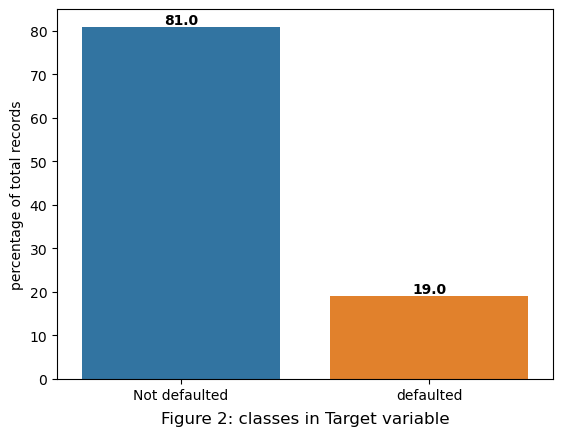

In [526]:
ax = sns.barplot(x=loan_data['label'],y=loan_data['percentage of total records'])
for i, v in enumerate(loan_data['percentage of total records']):
    ax.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')
ax.set_xlabel('')
fig_num = 2
ax.text(0.5, -0.12, f'Figure {fig_num}: classes in Target variable', transform=ax.transAxes, fontsize=12, ha='center')
plt.show()

### Feature Engineering


In [527]:
# How big the loan a person has taken with respect to his earnings, annual income to loan amount ratio
train['loan_to_income'] = train['annual_inc']/train['funded_amnt_inv']

In [528]:
# This column gives a magnitude of how much the repayment has gone off course 
# in terms of ratios.

train['bad_state'] = train['acc_now_delinq'] + (train['total_rec_late_fee']/train['funded_amnt_inv']) + (train['recoveries']/train['funded_amnt_inv']) + (train['collection_recovery_fee']/train['funded_amnt_inv']) + (train['collections_12_mths_ex_med']/train['funded_amnt_inv'])

In [529]:
# Total number of available/unused 'credit lines'
train['avl_lines'] = train['total_acc'] - train['open_acc']

In [530]:
# Interest paid so far
train['int_paid'] = train['total_rec_int'] + train['total_rec_late_fee']

### Scaling Dataset

In [531]:
# Here only normalizing metric continuous, metric discrete, categorical ordinal varibles

In [532]:
#encoded_df = pd.concat([encoded_df,train['loan_status']],axis =1)

In [533]:
#train = train.drop('loan_status',axis=1)

In [534]:
#scaler = Normalizer()

In [535]:
#train = pd.DataFrame(scaler.fit_transform(train),columns=train.columns)

In [536]:
#train = train.reset_index()

In [537]:
#train_without_encoded_var = train.drop('index',axis =1)

In [538]:
#encoded_df = encoded_df.reset_index()

In [539]:
#encoded_df = encoded_df.drop('index',axis =1)

In [540]:
#train = pd.concat([train_without_encoded_var,encoded_df],axis =1)

In [541]:
#train_without_encoded_var.corr()[train_without_encoded_var.corr() > 0.5]
#train_without_encoded_var.corr()

In [542]:
#sns.heatmap(train_without_encoded_var.corr())

In [543]:
# train = train.drop(['funded_amnt','funded_amnt_inv'],axis =1)

#### Using standardization

In [544]:
encoded_df = pd.concat([encoded_df,train['loan_status']],axis =1)

In [545]:
train = train.drop('loan_status',axis=1)

In [546]:
scaler = StandardScaler()

In [547]:
scaler.fit(train)

StandardScaler()

In [548]:
train = pd.DataFrame(scaler.transform(train),columns=train.columns)

In [549]:
train = train.reset_index()

In [550]:
train_without_encoded_var = train.drop('index',axis =1)

In [551]:
encoded_df = encoded_df.reset_index()

In [552]:
encoded_df = encoded_df.drop('index',axis =1)

In [553]:
train = pd.concat([train_without_encoded_var,encoded_df],axis =1)

In [554]:
train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_length,annual_inc,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,loan_status
0,-0.096632,-0.096628,-0.095911,-0.673612,-1.287735,1.335817,1.676222,1.698973,0.796461,-0.726622,...,0,0,0,0,0,0,0,1,0,0
1,-1.226192,-1.226194,-1.225927,-0.673612,-0.421408,-0.522392,-0.620254,-0.467006,-1.659457,-0.179470,...,0,0,0,0,0,0,0,0,1,0
2,-0.611144,-0.611142,-0.610630,-0.673612,-0.421408,-1.367651,-1.385745,-1.240570,-1.113698,-0.480931,...,0,0,0,0,0,0,0,0,1,0
3,-0.019751,-0.019747,-0.018999,-0.673612,1.337577,1.455921,0.910730,1.234835,1.069341,0.423453,...,0,0,0,0,0,0,0,1,0,0
4,0.098527,0.098533,0.099328,-0.673612,0.259512,-0.601706,-0.620254,-0.776432,1.069341,-0.375420,...,0,0,0,0,0,0,0,0,1,0


In [555]:
train.isna().sum()

loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
term                     0
batch_enrolled           0
                        ..
purpose_vacation         0
purpose_wedding          0
initial_list_status_f    0
initial_list_status_w    0
loan_status              0
Length: 61, dtype: int64

In [556]:
corr = train_without_encoded_var.corr()

Text(0.5, 1.05, 'Figure 3: correlation plot')

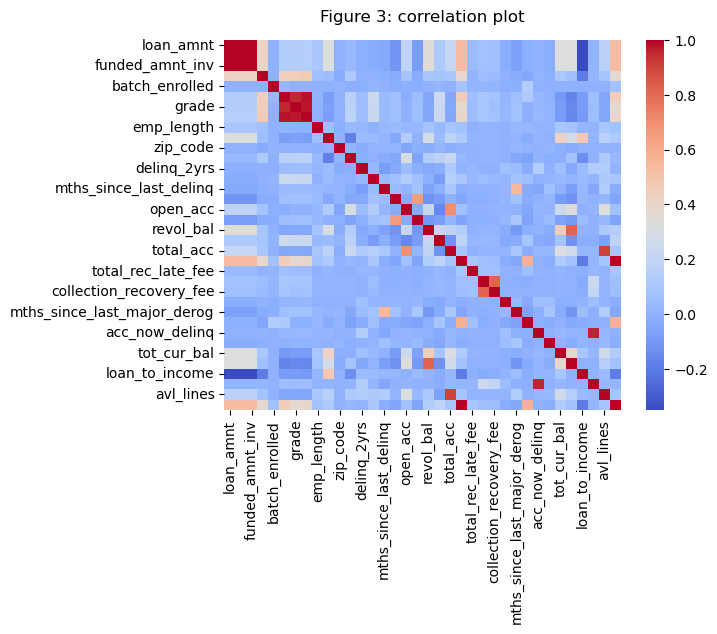

In [572]:
ax = sns.heatmap(corr, cmap='coolwarm')
ax.text(0.5, 1.05, f'Figure {3}: correlation plot', transform=ax.transAxes, fontsize=12, ha='center')

### Model Building

In [398]:
train_data, test_data = train_test_split(train, test_size=0.2, random_state=25)

In [399]:
training_data = pd.DataFrame(train_data, columns=train.columns)
testing_data = pd.DataFrame(test_data,columns=train.columns)

In [400]:
x_train = training_data.drop(['loan_status'],axis=1)
y_train = training_data['loan_status']
x_test = testing_data.drop(['loan_status'],axis=1)
y_test = testing_data['loan_status']

In [401]:
pca = PCA(n_components = 30)

In [402]:
df_train_pca = pd.DataFrame(pca.fit_transform(x_train))

In [403]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

In [404]:
explained_variance

In [405]:
df_test_pca = pd.DataFrame(pca.fit_transform(x_test))

### Gridsearch for logistic regression

In [406]:
logreg = LogisticRegression(max_iter =1000)

In [407]:
param_grid = {'C': [0.0001,0.001,0.0015,0.002],
              'class_weight': ['balanced'],
              'penalty': ['l1', 'l2']}

In [408]:
recall_scorer = make_scorer(recall_score, pos_label=1)

In [409]:
grid_search = GridSearchCV(logreg, param_grid=param_grid, scoring=recall_scorer, cv=5)

In [410]:
grid_search.fit(x_train, y_train)

In [411]:
print("Best parameters:", grid_search.best_params_)
print("Best precision score:", grid_search.best_score_)

In [412]:
y_pred = grid_search.best_estimator_.predict(x_test)

### Best Logistic Regression Model

In [413]:
clf = LogisticRegression(class_weight = 'balanced',max_iter=1000,C= 0.0015,penalty ='l2').fit(x_train, y_train)

In [414]:
y_pred  = clf.predict(x_test)

In [415]:
accuracy_train = clf.score(x_train, y_train)
print("Train Accuracy:", accuracy_train)

In [416]:
accuracy_test = clf.score(x_test, y_test)
print("Test Accuracy:", accuracy_test)

In [417]:
confusion_matrix(y_test,y_pred)

In [418]:
precision = precision_score(y_test,y_pred)
print("test precision",precision)

In [419]:
recall = recall_score(y_test,y_pred)
#print("test Recall",recall)

In [420]:
f1_score(y_test, y_pred)

### Gridsearch for DecisionTreeClassifier

In [421]:
decision_tree = DecisionTreeClassifier()

In [422]:
param_grid = {
    'max_depth': [5,6],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2]
}

In [423]:
recall_scorer = make_scorer(recall_score, pos_label=1)

In [424]:
grid_search = GridSearchCV(decision_tree, param_grid=param_grid, scoring=recall_scorer, cv=5)

In [425]:
grid_search.fit(x_train, y_train)

In [426]:
print("Best parameters:", grid_search.best_params_)
print("Best precision score:", grid_search.best_score_)

In [427]:
y_pred = grid_search.best_estimator_.predict(x_test)

### Best Decision Tree Model

In [428]:
decision_tree = DecisionTreeClassifier(max_depth=5,class_weight = 'balanced',min_samples_split =2,min_samples_leaf=2)
decision_tree.fit(x_train, y_train)

In [429]:
y_pred = decision_tree.predict(x_test)

In [430]:
accuracy_train = decision_tree.score(x_train, y_train)
print("Train Accuracy:", accuracy_train)

In [431]:
accuracy_test = decision_tree.score(x_test, y_test)
print("Test Accuracy:", accuracy_test)

In [432]:
confusion_matrix(y_test,y_pred)

In [433]:
precision = precision_score(y_test,y_pred)
print("test precision",precision)

In [434]:
recall = recall_score(y_test,y_pred)
print("test recall",recall)

In [435]:
f1_score(y_test, y_pred)

### Grid Search for XGB

In [436]:
xgb = XGBClassifier()

In [437]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [50, 100, 200, 300],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9]
}

In [438]:
recall_scorer = make_scorer(recall_score, pos_label=1)

In [439]:
grid_search = GridSearchCV(xgb, param_grid=param_grid,scoring=recall_scorer, cv=5)
grid_search.fit(x_train, y_train)

In [440]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

### Best XGB Model

In [441]:
clf = XGBClassifier(n_estimators=100,learning_rate=0.1,scale_pos_weight=20)

In [442]:
clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [443]:
y_pred = clf.predict(x_test)

In [444]:
accuracy_train = clf.score(x_train, y_train)
print("Train Accuracy:", accuracy_train)

Train Accuracy: 0.6131332611467417


In [445]:
accuracy_test = clf.score(x_test, y_test)
print("Test Accuracy:", accuracy_test)

Test Accuracy: 0.6064788118761132


In [446]:
confusion_matrix(y_test,y_pred)

array([[32661, 30413],
       [  297, 14668]], dtype=int64)

In [447]:
precision = precision_score(y_test,y_pred)
print("test precision",precision)

test precision 0.32536988975399833


In [448]:
recall = recall_score(y_test,y_pred)
print("test recall",recall)

test recall 0.9801536919478784


In [449]:
f1_score(y_test, y_pred)

0.48855877160843353